<a href="https://colab.research.google.com/github/KhinMyatNandar/Fraud-Detection/blob/main/ROS_CCFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import missingno as msno
%matplotlib inline

In [ ]:
CCFD= pd.read_csv('/content/new_creditcard.csv')

In [ ]:
df=pd.DataFrame(CCFD)

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Separate the features and target variables
X= df.drop("Class", axis=1)
y= df["Class"]#target variables

In [ ]:
#Split the dataset into 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 198608 samples
Testing set size: 85118 samples


#ROS

In [ ]:
pip install matplotlib seaborn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
ros= RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

In [ ]:
# Display the new class distribution
print('Original dataset shape:', Counter(y_train))
print('ROS dataset shape:', Counter(y_train_ros))

Original dataset shape: Counter({0: 198277, 1: 331})
ROS dataset shape: Counter({0: 198277, 1: 198277})


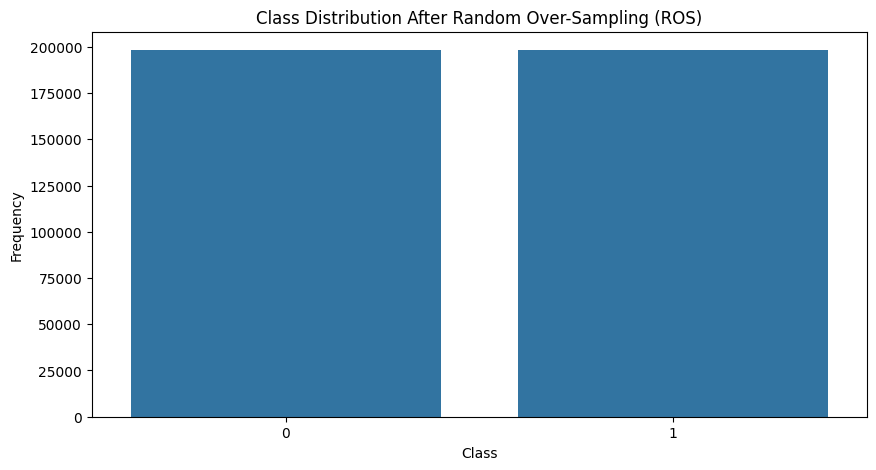

In [ ]:
# Plot the class distribution after ROS
ros_distribution = Counter(y_train_ros)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(ros_distribution.keys()), y=list(ros_distribution.values()))
plt.title('Class Distribution After Random Over-Sampling (ROS)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

##Model Training

In [ ]:
pip install xgboost scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Defining the models
models={
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
for i in range(len(list(models))):
  #model= list(models.values())[i]#youtube
    model_name=list(models.keys())[i]
    model=list(models.values())[i]
    #print(f"Training {model}...") #to ensure loop is worked
    model.fit(X_train_ros, y_train_ros)#train model


#predictions
    y_train_pred_ros= model.predict(X_train_ros)
    y_test_pred_ros= model.predict(X_test)
    y_test_proba_ros= model.predict_proba(X_test)[:,1]#needed for AUC and AUPRC


    #Training set performance
    ros_train_precision= precision_score(y_train_ros, y_train_pred_ros)
    ros_train_recall= recall_score(y_train_ros, y_train_pred_ros)
    ros_train_f1_score= f1_score(y_train_ros, y_train_pred_ros, average='weighted')
    ros_train_roc_auc= roc_auc_score(y_train_ros, y_train_pred_ros)
    ros_train_auprc= average_precision_score(y_train_ros, y_train_pred_ros)

        #Testing set performance
    ros_test_precision= precision_score(y_test, y_test_pred_ros)
    ros_test_recall= recall_score(y_test, y_test_pred_ros)
    ros_test_f1_score= f1_score(y_test, y_test_pred_ros, average='weighted')
    ros_test_roc_auc= roc_auc_score(y_test, y_test_pred_ros)
    ros_test_auprc= average_precision_score(y_test, y_test_pred_ros)

        #print(list(models.keys())[i])
    print(f"Model:{model_name}")
    print('Model performace for Training set with ROS')
    print("- Precision : {:.4f}".format(ros_train_precision))
    print("- Recall : {:.4f}".format(ros_train_recall))
    print("- F1 Score : {:.4f}".format(ros_train_f1_score))
    print("- AUC-ROC : {:.4f}".format(ros_train_roc_auc))
    print("- AUPRC : {:.4f}".format(ros_train_auprc))

    print('----------------------------------')

    print('Model performace for Testing set with ROS')
    print("- Precision : {:.4f}".format(ros_test_precision))
    print("- Recall : {:.4f}".format(ros_test_recall))
    print("- F1 Score : {:.4f}".format(ros_test_f1_score))
    print("- AUC-ROC : {:.4f}".format(ros_test_roc_auc))
    print("- AUPRC : {:.4f}".format(ros_test_auprc))

    print('='*35)
    print('\n')

Model:Logistic Regression
Model performace for Training set with ROS
- Precision : 0.9725
- Recall : 0.9213
- F1 Score : 0.9476
- AUC-ROC : 0.9476
- AUPRC : 0.9353
----------------------------------
Model performace for Testing set with ROS
- Precision : 0.0529
- Recall : 0.8873
- F1 Score : 0.9850
- AUC-ROC : 0.9304
- AUPRC : 0.0471


Model:XGBoost
Model performace for Training set with ROS
- Precision : 1.0000
- Recall : 1.0000
- F1 Score : 1.0000
- AUC-ROC : 1.0000
- AUPRC : 1.0000
----------------------------------
Model performace for Testing set with ROS
- Precision : 0.9469
- Recall : 0.7535
- F1 Score : 0.9995
- AUC-ROC : 0.8767
- AUPRC : 0.7139


Model:K-Nearest Neighbors
Model performace for Training set with ROS
- Precision : 0.9996
- Recall : 1.0000
- F1 Score : 0.9998
- AUC-ROC : 0.9998
- AUPRC : 0.9996
----------------------------------
Model performace for Testing set with ROS
- Precision : 0.7037
- Recall : 0.8028
- F1 Score : 0.9991
- AUC-ROC : 0.9011
- AUPRC : 0.5653
